In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження датасету
mountain_df = pd.read_csv("../data/mountain_dataset_with_markup.csv", converters={'marker': eval})

# Просмотр первых строк данных
mountain_df.head()


,text,marker
0,A visit to a science museum for hands-on learn...,[]
1,Voice surface coach set democratic time year. ...,[]
2,Parent according maybe activity activity finis...,[]
3,A visit to a sculpture garden with intriguing ...,[]
4,The Julian Alps in Slovenia offer pristine lak...,"[(11, 15)]"


In [4]:
mountain_df.shape

(1584, 2)

In [5]:
# Функція для розділення маркерів на окремі слова
def divide_markers(text: str, markers):
    divided_markers = []
    
    for start, end in markers:
        # Отримуємо назву гори з тексту за допомогою маркерів
        mountain_name = text[start:end]
        # Розділяємо на окремі слова
        words = mountain_name.split(" ")

        # Генеруємо розділені маркери для кожного слова
        for word in words:
            word_start = text.find(word, start)
            word_end = word_start + len(word)
            divided_markers.append((word_start, word_end))

    return divided_markers

In [6]:
# Додаємо нові стовпці для маркерів і кількості гір
mountain_df['markers'] = mountain_df.apply(lambda row: divide_markers(row['text'], row['marker']), axis=1)
mountain_df['mountain_count'] = mountain_df['markers'].apply(len)

In [8]:
mountain_df.head()

,text,marker,markers,mountain_count
0,A visit to a science museum for hands-on learn...,[],[],0
1,Voice surface coach set democratic time year. ...,[],[],0
2,Parent according maybe activity activity finis...,[],[],0
3,A visit to a sculpture garden with intriguing ...,[],[],0
4,The Julian Alps in Slovenia offer pristine lak...,"[(11, 15)]","[(11, 15)]",1


In [9]:
# Функція для отримання списку гір із тексту за маркерами
def get_mountains(row):
    text, loc_markers = row['text'], row['markers']
    return [text[s:e] for s, e in loc_markers]

In [11]:
# Виведення прикладу тексту та гір
sample_row = mountain_df[mountain_df['mountain_count'] >= 1].iloc[2]
print(sample_row['text'])
print(get_mountains(sample_row))


Feeling the tranquility and serenity of the Andes Mountains #naturelover #mountainscape
['Andes']


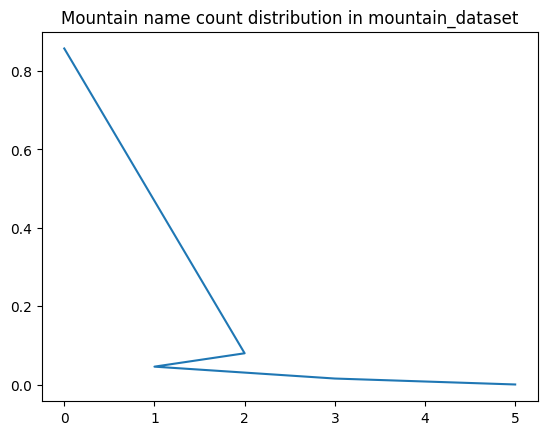

In [12]:
# Візуалізація розподілу кількості гір у датасеті
plt.title('Mountain name count distribution in mountain_dataset')
plt.plot(mountain_df['mountain_count'].value_counts(normalize=True))
plt.show()

In [13]:
# Підрахунок кількості гір
mountains = mountain_df.apply(get_mountains, axis=1)
result = [mountain for sublist in mountains.to_list() for mountain in sublist]

# Підрахунок частоти кожної гори
print(pd.Series(result).value_counts())

Mountains       82
Mount           45
Alps            34
Andes           23
Himalayas       19
Taurus          12
Range           12
Rhodope          9
Everest          9
Rocky            8
Appalachian      8
Fuji             7
Shan             7
Kilimanjaro      7
Scandinavian     7
Rainier          5
Sierra           5
Olympus          5
Denali           5
Kunlun           5
Dividing         4
Atlas            4
Patagonian       4
Drakensberg      4
Great            4
Brooks           4
Carpathian       4
Tien             4
Blue             4
Cascade          4
Ridge            4
Tatra            4
Tian             3
Cook             3
Apennine         3
Dolomites        3
Ural             3
Elbrus           3
mountains        3
Nevada           3
Rwenzori         3
Kenya            2
Columbia         2
St.              2
Occidental       2
Madre            2
Helens           2
Icefield         2
K2               1
Dolomite         1
Logan            1
Eiger            1
Name: count,

In [14]:
mountains = mountain_df.apply(get_mountains, axis=1)

result = []
for x in mountains.to_list():
    for l in x:
        result.append(l)

pd.Series(result).value_counts()

Mountains       82
Mount           45
Alps            34
Andes           23
Himalayas       19
Taurus          12
Range           12
Rhodope          9
Everest          9
Rocky            8
Appalachian      8
Fuji             7
Shan             7
Kilimanjaro      7
Scandinavian     7
Rainier          5
Sierra           5
Olympus          5
Denali           5
Kunlun           5
Dividing         4
Atlas            4
Patagonian       4
Drakensberg      4
Great            4
Brooks           4
Carpathian       4
Tien             4
Blue             4
Cascade          4
Ridge            4
Tatra            4
Tian             3
Cook             3
Apennine         3
Dolomites        3
Ural             3
Elbrus           3
mountains        3
Nevada           3
Rwenzori         3
Kenya            2
Columbia         2
St.              2
Occidental       2
Madre            2
Helens           2
Icefield         2
K2               1
Dolomite         1
Logan            1
Eiger            1
Name: count,